In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [16]:
classifier = Sequential()

### CNN model building

In [17]:
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [18]:
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
train_path = r'D:\breakHis project\breakhis 400x\train'
valid_path = r'D:\breakHis project\breakhis 400x\val'
test_path = r'D:\breakHis project\breakhis 400x\test'

In [22]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
val_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1184 images belonging to 2 classes.
Found 338 images belonging to 2 classes.
Found 171 images belonging to 2 classes.


In [24]:
model = classifier.fit(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/20
37/37 [==============================] - 39s 1s/step - loss: 0.6670 - accuracy: 0.6360 - val_loss: 0.5527 - val_accuracy: 0.6775
Epoch 2/20
37/37 [==============================] - 24s 652ms/step - loss: 0.5247 - accuracy: 0.7703 - val_loss: 0.4780 - val_accuracy: 0.8107
Epoch 3/20
37/37 [==============================] - 28s 769ms/step - loss: 0.4889 - accuracy: 0.8100 - val_loss: 0.5348 - val_accuracy: 0.7367
Epoch 4/20
37/37 [==============================] - 25s 675ms/step - loss: 0.4779 - accuracy: 0.8066 - val_loss: 0.4607 - val_accuracy: 0.8491
Epoch 5/20
37/37 [==============================] - 30s 803ms/step - loss: 0.4741 - accuracy: 0.8083 - val_loss: 0.4393 - val_accuracy: 0.8432
Epoch 6/20
37/37 [==============================] - 24s 658ms/step - loss: 0.4599 - accuracy: 0.8243 - val_loss: 0.4396 - val_accuracy: 0.8462
Epoch 7/20
37/37 [==============================] - 23s 623ms/step - loss: 0.4458 - accuracy: 0.8370 - val_loss: 0.5389 - val_accuracy: 0.7249
Ep

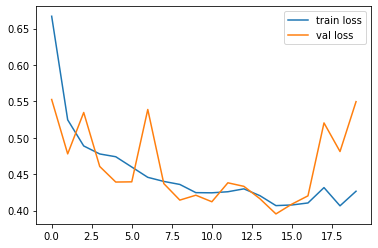

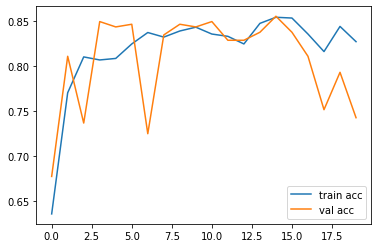

In [26]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(model.history['loss'], label='train loss')
plt.plot(model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model.history['accuracy'], label='train acc')
plt.plot(model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

In [28]:
# average training accuracy
import numpy as np
np.mean(model.history['accuracy'])

0.8187077671289444

In [30]:
# val accuracy
classifier.evaluate(val_set)

11/11 [==============================] - 5s 454ms/step - loss: 0.5497 - accuracy: 0.7426


[0.5497029423713684, 0.7426035404205322]

In [31]:
# test accuracy
classifier.evaluate(test_set)

6/6 [==============================] - 3s 583ms/step - loss: 0.6165 - accuracy: 0.6959


[0.6164634823799133, 0.6959064602851868]

In [32]:
test_set.class_indices

{'benign': 0, 'malignant': 1}

In [34]:
y_pred = (classifier.predict(test_set) > 0.5).astype("int32")

6/6 [==============================] - 3s 404ms/step


In [35]:
y_true = test_set.labels

In [36]:
from sklearn.metrics import confusion_matrix, classification_report,matthews_corrcoef
predIdxs = y_pred

print('\n')
print(classification_report(test_set.labels, predIdxs,target_names = ['benign','malignant'], digits=5))

print('\n')
mcc = matthews_corrcoef(y_true,y_pred)
print(f"mcc {mcc}")



              precision    recall  f1-score   support

      benign    0.52222   0.83929   0.64384        56
   malignant    0.88889   0.62609   0.73469       115

    accuracy                        0.69591       171
   macro avg    0.70556   0.73269   0.68926       171
weighted avg    0.76881   0.69591   0.70494       171



mcc 0.43740127546270086
